## Исследование данных о российском кинопрокате



### Описание проекта
Заказчик исследования — Министерство культуры Российской Федерации.
В ходе исследования был изучен рынок российского кинопроката, выявлены текущие тренды. 

С целью рекомендации для выбора фильмов для государственной поддержки.

Описание данных
- Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.
- Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Импортируем библиотеки, загрузим данные и просмотрим их:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
movies = pd.read_csv('/datasets/mkrf_movies.csv')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
movies['puNumber'] = pd.to_numeric(movies['puNumber'], errors='coerce').fillna(0).astype('int')

In [5]:
movies_box_office = pd.read_csv('/datasets/mkrf_shows.csv')
movies_box_office.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [6]:
movies_box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Приведем puNumber к единому типу данных и объединим таблиы

In [7]:
data = movies.merge(movies_box_office, on='puNumber', how='left')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Предобработка данных

проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

 Требуется изменить тип данных: <br>
 show_start_date к типу datetime <br>
 ratings к float <br>

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format="%Y-%m-%d")

In [11]:
data['ratings'] = data['ratings'].str.replace('%', '').astype('float')

In [12]:
data['ratings'] = np.where(data['ratings'] > 10, data['ratings'] / 10, data['ratings'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Имеются пропуски в следующих столбцах: <br>
<br>
film_studio <br>
production_country <br>
director <br>
producer <br>
Эти данные не понадобятся нам для исследования, поэтому пропуски в них не будм заполнять <br>
<br>
refundable_support <br>
nonrefundable_support <br>
financing_source <br>
Данные в этих столбцах указаны только для тех фильмов, которые получили государственную поддержку, пропуски в них можно заполнить значением 0 <br>
<br>
budget <br>
Представлены данные только для фильмов с господдержкой, для анализа показателей по другим фильмам требуется запросить дополнительные данные. Самостоятельно пропуски заполнить мы не можем <br>
<br>
ratings<br>
genres<br>
Эти данные нужны для исследования фильмов с господдержкой отсутствуют данные в 16 строках из 332, пропусков незначителдьное количество, оставим их без изменений
<br>
box_office <br>
для заполнения этих пропусков требуется запросить дополнительные данные. Самостоятельно пропуски заполнить мы не можем <br>

In [14]:
data['refundable_support'] = data['refundable_support'].fillna(0)
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
data['financing_source'] = data['financing_source'].fillna(0)

In [15]:
data.query('(not budget.isna() and (ratings.isna() or genres.isna()))')[['title','ratings', 'genres']]

,title,ratings,genres
1448,Бесславные придурки,NaN,NaN
2150,РЕВЕРБЕРАЦИЯ,NaN,NaN
2451,ПРАЗДНИК НЕПОСЛУШАНИЯ,NaN,NaN
2817,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУ...,NaN,NaN
2999,Жили-были мы,NaN,NaN
3061,Первая Мировая война WWI,NaN,NaN
3385,О любви (2017),NaN,NaN
3389,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,NaN,NaN
3614,Три сестры,NaN,NaN
3655,О чем молчат французы,NaN,NaN


некоторые фильмы записаны в разных регистрах, приведем все к строчным символам

In [16]:
data['title'] = data['title'].str.lower()

Проверка на дубликаты puNumber

In [17]:
data.duplicated(subset='puNumber').sum()

2

In [18]:
data[data.duplicated(keep=False, subset='puNumber')]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,7.00,"мелодрама,комедия",NaN
4639,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,7.60,"драма,мелодрама,история",NaN
5067,анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,7.40,"комедия,криминал",NaN
5068,анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,0,6.80,"комедия,криминал",NaN


In [19]:
data = data.drop_duplicates(subset='puNumber')

Обнаружены дубликаты в столбце puNumber: <br>
для первого случая неверно указаны номера прокатного удостоверния, так как не может быть одинакового номера у 2 разных фильмов<br>
во втором случае имеется неявный дубликат из за разного написания фамилии режисера<br>
<br>
поскольку дубликатов незначительное количестов и для данных фильмов нет информации по сборам и по бюджету, большой пользы для исследования они не принесут, поэтому просто удалим эти дубликаты.

Проверка на дубликаты puNumber title

In [20]:
data.duplicated(subset='title').sum()

723

In [21]:
data[data.duplicated(keep=False, subset='title')].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,0,6.80,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,0,6.80,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,0,6.80,"фантастика,боевик,триллер",NaN
12,малышка на миллион /по мотивам рассказов ф.х.т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,8.10,"драма,спорт",NaN
26,оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,0.00,0.00,NaN,0,7.70,"боевик,драма,криминал",NaN


дуликаты присутствуют из за того что одинаковые фильмы имеют разыне прокатные удостоверения и показывались в разные даты<br>
для ананлиза сборов и показов это не помешает, поэтому оставляем все без изменений<br>
для оценки финансирования и бюджетов проверим сколько таких фильмов содержат известные данные по финансированию

In [22]:
data[data.duplicated(subset='title', keep=False) & data['budget'] ]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3333,тень,111011316,2016-07-12 12:00:00+00:00,Художественный,"ООО ""Студия АСДС""",Россия,Д.Светозаров,"Д.Светозаров, А.Сигле",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","46,195,427.00",Министерство культуры,7.10,"фэнтези,боевик,драма","322,155.00"
3614,три сестры,111004417,2017-06-09 12:00:00+00:00,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","37,878,787.00",Министерство культуры,NaN,NaN,"1,067,649.00"
3761,хороший мальчик,111009816,2016-06-07 12:00:00+00:00,Художественный,"ООО ""2Д Целлулоид"", ООО ""Арт Пикчерс Студия""",Россия,О.Карас,"В.Соловьев, Ю.Храпов, А.Пескова, Д.Рудовский, ...",«12+» - для детей старше 12 лет,0.00,"35,000,000.00","54,000,000.00",Министерство культуры,6.60,комедия,"71,955,528.89"
5829,прощаться не будем,111003418,2018-06-21 12:00:00+00:00,Художественный,"ООО ""РФГ Корп"", ООО ""Студия ""МОСТ""",Россия,П.Дроздов,А.Петрухин,«6+» - для детей старше 6 лет,0.00,"35,000,000.00","109,814,241.00",Министерство культуры,5.80,"военный,драма,история","5,539,973.15"
6898,мысленный волк,111007419,2019-06-09 12:00:00+00:00,Художественный,"ООО ""САГА""",Россия,Валерия Гай Германика,"А.Савельев, А.Васильев, Валерия Гай Германика",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","48,000,000.00",Министерство культуры,5.30,"фэнтези,драма,фильм-нуар","2,258,384.00"
7322,успех,111018519,2019-11-04 12:00:00+00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,"5,000,000.00","20,000,000.00","75,000,000.00",Фонд кино,7.80,драма,"3,181,218.00"
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN


In [23]:
data.query('not budget.isna()').duplicated(subset='title', keep=False).sum()

0

несмотря на то что указано несколько прокатных удостоверений на один фильм, данные по финансированию указаны единожды для каждого фильма, поэтому также оставляем без изменений  


Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах и исправим ее


In [24]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [25]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [26]:
data['financing_source'].unique()

array([0, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

В столбце type присутствуют пробелы перед названием, уберем их <br>
в остальных столбцах все в порядке

In [27]:
data['type'] = data['type'].str.strip()

In [28]:
data['ratings'] = np.where(data['ratings'] > 10, data['ratings'] / 10, data['ratings'])

In [29]:
data['ratings'] = np.where(data['ratings'] > 10, data['ratings'] / 10, data['ratings'])

In [30]:
data['ratings'] = np.where(data['ratings'] > 10, data['ratings'] / 10, data['ratings'])

#### Шаг 2.5. Проверьте количественные значения

Проверим, есть ли в количественных столбцах подозрительные данные.

In [31]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,484.00","7,484.00","7,484.00",332.00,"6,517.00","3,158.00"
mean,"135,155,565.09","526,322.82","2,172,860.54","127,229,716.68",6.49,"76,478,696.16"
std,"38,361,587.81","5,781,874.20","16,151,054.33","188,588,333.12",1.11,"240,353,122.82"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,024,993.00",0.00,0.00,"42,000,000.00",5.90,"86,239.00"
50%,"121,015,418.50",0.00,0.00,"68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,312.25",0.00,0.00,"141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


выделяются данные, которые в 10 раз меньше средних, проверим их <br>
в столбце бюджет есть нулевые значения

In [32]:
data.query('budget > 500000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2920,экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00"
3255,время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,"75,000,000.00","175,000,000.00","528,441,977.00",Фонд кино,7.50,"приключения,триллер,биография","544,332,260.00"
3351,дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60"
5437,матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00"
5569,легенда о коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,"100,000,000.00","250,000,000.00","500,012,729.00",Фонд кино,6.40,"история,боевик,фэнтези","590,405,065.00"
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
6549,т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52"
7114,тайна печати дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59"
7171,грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,"60,000,000.00","779,941,965.00",Министерство культуры,6.90,"драма,биография,история","54,243,202.71"
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"


In [33]:
data.query('refundable_support > 100000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3164,герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,"110,000,000.00","30,000,000.00","222,177,790.00","Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма","81,430,626.82"
3351,дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60"
5437,матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00"
6472,три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"115,000,000.00",0.00,"185,500,705.00",Фонд кино,6.50,"мультфильм,приключения,семейный","577,368,853.25"
7114,тайна печати дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59"


In [34]:
data.query('nonrefundable_support > 300000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2920,экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00"
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
7464,союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"
7474,вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN


In [35]:
data.query('box_office > 2000000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2859,зверополис,124000316,2016-02-15 12:00:00+00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,0.00,0.00,NaN,0,8.30,"мультфильм,комедия,криминал","2,048,126,108.00"
3488,пираты карибского моря: мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,6.60,"фэнтези,боевик,комедия","2,118,396,119.00"
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
6549,т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52"
6820,мстители: финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,0.00,0.00,NaN,0,7.60,"фантастика,боевик,драма","2,576,613,776.83"
7456,холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79"


Сильные отклонения от средних значений можно объяснить популярностью фильмов, соответсвенно выше сборы и выше бюджет. оставим эти значения без изменений.

In [36]:
data.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,савва. сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Есть строки где бюджет равен 0 при этом изестны возвратные и невозвратные средства, заполним эти значения бюджета минимально возможным известным значением (возвратные + невозвратные) с учетом медианного значения доли средств господержки.<br>

In [37]:
data['state_percent'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget'])*100

In [38]:
data['budget'] = np.where(data['budget'] == 0, (data['refundable_support'] + data['nonrefundable_support'])/(data['state_percent'].median())*100, data['budget'])

проверка: превышает ли где-то сумма государственной поддержки бюджет фильма

In [39]:
data[data['budget'] < data['refundable_support'] + data['nonrefundable_support']].shape[0]

0

Создадим новый столбец с информацией о годе проката.

In [40]:
data['show_year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [41]:
def split (row):
    cell = row.split(sep = ',')
    return cell[0]

In [42]:
data['main_director'] = data.query('not director.isna()')['director'].apply(split)

In [43]:
data['main_genres'] = data.query('not genres.isna()')['genres'].apply(split)

Доля господдержки от общего бюджета фильма:

In [45]:
data.query('not state_percent.isna()')['state_percent']

1281   33.37
1448   70.00
1498   61.27
1524   69.01
1792   62.48
        ... 
7464   51.02
7466   52.63
7474   52.97
7476   65.00
7478   66.60
Name: state_percent, Length: 332, dtype: float64

### Исследовательский анализ данных


Выясним сколько фильмов выходило в прокат каждый год и какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

,count
,puNumber
show_year,
2010,983
2011,622
2012,593
2013,630
2014,807
2015,705
2016,818
2017,505


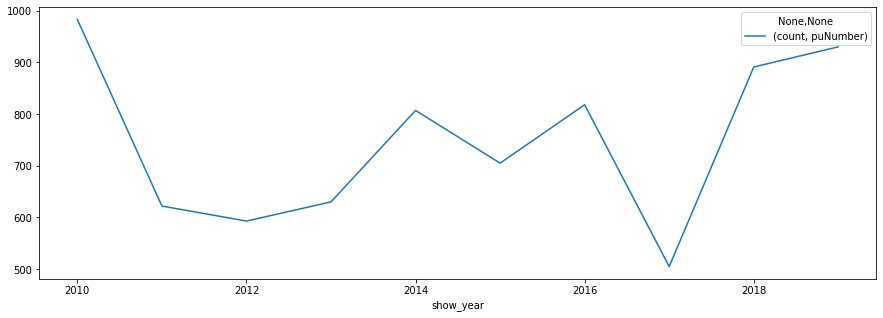

In [46]:
data.pivot_table(index = 'show_year', values = ['puNumber'], aggfunc=['count']).plot(style = '-', figsize = (15,5))
data.pivot_table(index = 'show_year', values = ['puNumber'], aggfunc=['count'])

,count
show_year,
2010,10.68
2011,17.52
2012,21.59
2013,29.21
2014,34.57
2015,65.96
2016,64.30
2017,70.69
2018,53.31


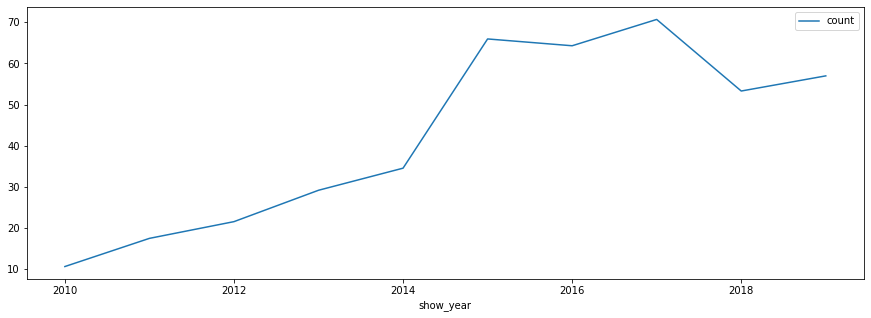

In [47]:
b = data.pivot_table(index = 'show_year', values = ['puNumber'], aggfunc=['count'])
a = data.pivot_table(index = 'show_year', values = ['box_office'], aggfunc=['count'])
a.columns = ['count']
b.columns = ['count']
((a / b)*100).plot(style = '-', figsize = (15,5))
((a / b)*100)

в период с 2010 по 2019 год выходит от 505 до 985 фильмов.<br>
наибольшее количество фильмов было выпущено в 2010 и в 2019 году<br>
в 2017 был спад, было выпущено в 1,5 раза меньше фильмов чем за соседние даты<br>
процент известных данных о прокате возрастает с каждым годом, с 10% в 2010 до 70% в 2017<br>
известных жанных о прокате за 2018 - 2019 годы ~ 55%

Изменение динамики проката по годам.

,sum,count
,box_office,box_office
show_year,,
2010,"2,428,654.00",105
2011,"14,102,765.00",109
2012,"6,955,423.00",128
2013,"29,799,706.20",184
2014,"7,444,951,859.20",279
2015,"39,497,365,196.40",465
2016,"47,866,299,741.91",526
2017,"48,563,707,217.51",357


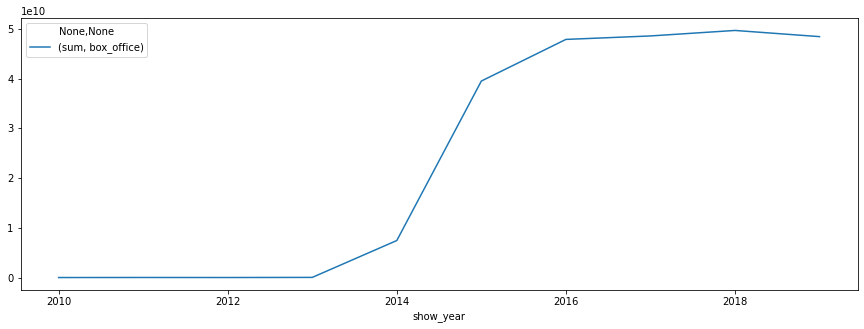

In [48]:
data.pivot_table(index = 'show_year', values = ['box_office'], aggfunc=['sum']).plot(style = '-', figsize = (15,5))
data.pivot_table(index = 'show_year', values = ['box_office'], aggfunc=['sum','count'])

основная масса фильмов с известными данными о прокате была выпущена с 2015 по 2019 годы, за этот период минимальные сборы были в 2014 году, в дальнейшем сумма сборов не менялась за последующие годы, несмотря на то что выходило разное число фильмов<br>

Средняя и медианная сумма сборов для каждого года.

In [49]:
data.pivot_table(index = 'show_year', values = ['box_office'], aggfunc=['mean','median','count'])

,mean,median,count
,box_office,box_office,box_office
show_year,,,
2010,"23,130.04","1,700.00",105
2011,"129,383.17","3,000.00",109
2012,"54,339.24","5,660.00",128
2013,"161,954.92","3,522.50",184
2014,"26,684,415.27","18,160.00",279
2015,"84,940,570.31","4,920,933.00",465
2016,"91,000,569.85","3,846,679.41",526
2017,"136,032,793.33","9,968,340.00",357


медианная сумма сборов, за 2016 и 2019 примерно в 2 раза меньше чем за 2017 и 2018<br>
при этом средние значения не так сильно отличаются, во видимому в 2016 и 2019, выходили блокбастеры, с большими сборами, что и определило высокие сборы за год<br>

Зависимсость сборов от возрастных ограничений

In [50]:
data.query('show_year >= 2015').pivot_table(index = 'show_year', columns='age_restriction', values = ['box_office'], aggfunc=['sum', 'count'])

sum  \
                                            box_office   
age_restriction «0+» - для любой зрительской аудитории   
show_year                                                
2015                                    379,054,578.37   
2016                                    150,228,848.67   
2017                                    229,598,930.00   
2018                                     32,449,002.11   
2019                                     17,746,066.82   

                                                 \
                                                  
age_restriction «12+» - для детей старше 12 лет   
show_year                                         
2015                          13,616,082,008.91   
2016                          12,204,446,524.39   
2017                           7,851,427,660.67   
2018                          14,267,291,660.69   
2019                          12,680,198,773.67   

                                                                             \
                                                                              
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
show_year                                                                     
2015                          11,368,120,870.27            5,432,308,367.44   
2016                          16,664,548,541.74            6,793,929,818.87   
2017                          18,745,042,900.06            9,651,495,581.02   
2018                          16,503,602,346.96            8,760,085,501.15   
2019                          12,753,418,984.60           10,121,796,303.64   

                                               \
                                                
age_restriction «6+» - для детей старше 6 лет   
show_year                                       
2015                         8,701,799,371.41   
2016                        12,053,146,008.24   
2017                        12,086,142,145.76   
2018                        10,104,974,623.41   
2019                        12,852,548,650.86   

                                                 count  \
                                            box_office   
age_restriction «0+» - для любой зрительской аудитории   
show_year                                                
2015                                                39   
2016                                                41   
2017                                                 3   
2018                                                 5   
2019                                                 3   

                                                 \
                                                  
age_restriction «12+» - для детей старше 12 лет   
show_year                                         
2015                                         73   
2016                                         82   
2017                                         41   
2018                                         67   
2019                                         85   

                                                                             \
                                                                              
age_restriction «16+» - для детей старше 16 лет «18+» - запрещено для детей   
show_year                                                                     
2015                                        168                         132   
2016                                        182                         151   
2017                                        121                         147   
2018                                        156                         179   
2019                                        178                         183   

                                               
                                               
age_restriction «6+» - для детей старше 6 лет  
show_year                                      
2015                       

In [51]:
data.query('show_year >= 2015').pivot_table(index = 'show_year', columns='age_restriction', values = ['box_office'], aggfunc=['sum']).sum()

                 age_restriction                       
sum  box_office  «0+» - для любой зрительской аудитории      809,077,425.97
                 «12+» - для детей старше 12 лет          60,619,446,628.33
                 «16+» - для детей старше 16 лет          76,034,733,643.63
                 «18+» - запрещено для детей              40,759,615,572.12
                 «6+» - для детей старше 6 лет            55,798,610,799.68
dtype: float64

count            91.00
mean      8,890,960.72
std      29,003,523.95
min               0.00
25%         353,599.00
50%       2,943,318.70
75%       4,511,473.97
max     206,478,186.00
Name: box_office, dtype: float64

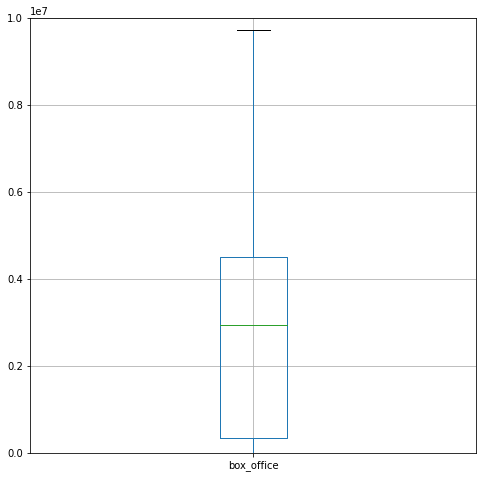

In [52]:
data.query('age_restriction == "«0+» - для любой зрительской аудитории" and show_year >= 2015').boxplot('box_office', figsize=(8, 8)).set_ylim(0, 10000000)
data.query('age_restriction == "«0+» - для любой зрительской аудитории"and show_year >= 2015')['box_office'].describe()

count             348.00
mean      174,193,812.15
std       380,149,277.52
min                 0.00
25%           615,594.25
50%         5,065,044.25
75%       134,070,320.07
max     3,073,568,690.79
Name: box_office, dtype: float64

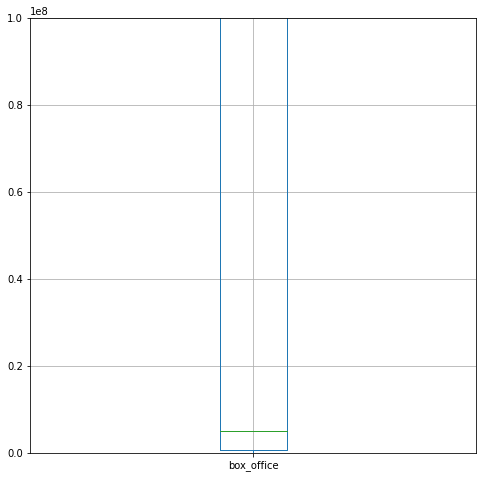

In [53]:
data.query('age_restriction == "«12+» - для детей старше 12 лет" and show_year >= 2015').boxplot('box_office', figsize=(8, 8)).set_ylim(0, 100000000)
data.query('age_restriction == "«12+» - для детей старше 12 лет" and show_year >= 2015')['box_office'].describe()

count             805.00
mean       94,453,085.27
std       254,406,434.04
min                 0.00
25%         1,097,314.00
50%         5,600,007.00
75%        43,922,035.70
max     2,576,613,776.83
Name: box_office, dtype: float64

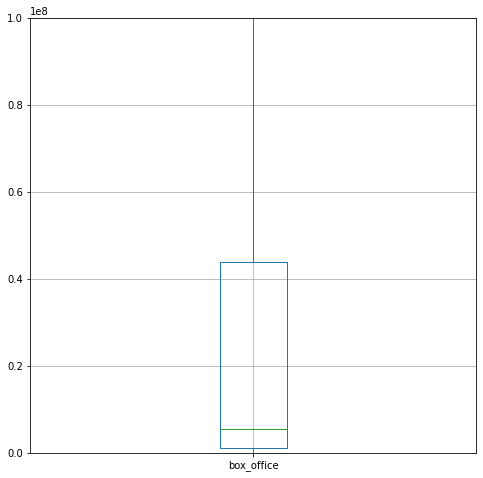

In [54]:
data.query('age_restriction == "«16+» - для детей старше 16 лет" and show_year >= 2015').boxplot('box_office', figsize=(8, 8)).set_ylim(0, 100000000)
data.query('age_restriction == "«16+» - для детей старше 16 лет" and show_year >= 2015')['box_office'].describe()

count             792.00
mean       51,464,161.08
std       153,449,857.06
min               600.00
25%         1,559,032.38
50%         6,154,439.17
75%        31,200,768.72
max     1,890,368,076.47
Name: box_office, dtype: float64

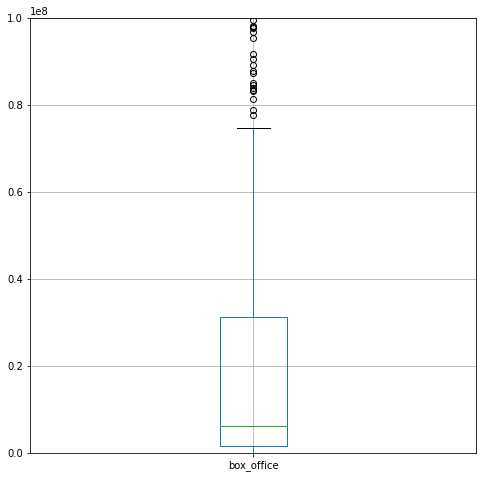

In [55]:
data.query('age_restriction == "«18+» - запрещено для детей" and show_year >= 2015').boxplot('box_office', figsize=(8, 8)).set_ylim(0, 100000000)
data.query('age_restriction == "«18+» - запрещено для детей" and show_year >= 2015')['box_office'].describe()

count             317.00
mean      176,020,854.26
std       381,635,082.85
min               200.00
25%         1,834,079.50
50%        13,736,207.98
75%       120,700,156.00
max     2,779,686,144.00
Name: box_office, dtype: float64

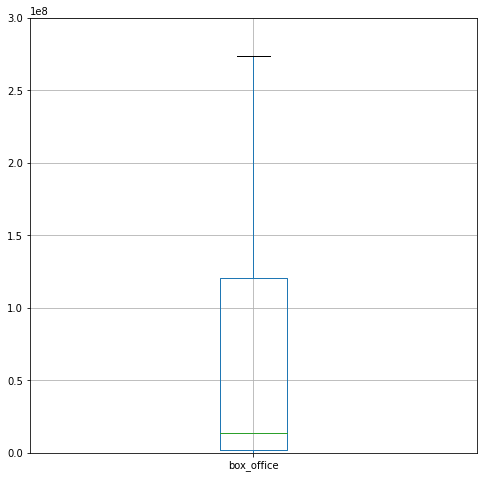

In [56]:
data.query('age_restriction == "«6+» - для детей старше 6 лет" and show_year >= 2015').boxplot('box_office', figsize=(8, 8)).set_ylim(0, 300000000)
data.query('age_restriction == "«6+» - для детей старше 6 лет" and show_year >= 2015')['box_office'].describe()

In [57]:
data.query('show_year >= 2015').pivot_table(index = 'show_year', columns='age_restriction', values = ['box_office'], aggfunc=['mean', 'median']).mean()

                    age_restriction                       
mean    box_office  «0+» - для любой зрительской аудитории    20,464,319.82
                    «12+» - для детей старше 12 лет          177,795,616.29
                    «16+» - для детей старше 16 лет           98,317,858.72
                    «18+» - запрещено для детей               51,210,516.79
                    «6+» - для детей старше 6 лет            182,445,927.72
median  box_office  «0+» - для любой зрительской аудитории     7,039,188.12
                    «12+» - для детей старше 12 лет            8,278,051.43
                    «16+» - для детей старше 16 лет            6,346,654.92
                    «18+» - запрещено для детей                6,343,795.20
                    «6+» - для детей старше 6 лет             20,592,708.40
dtype: float64

наименьшие сборы у фильмов «0+», кроме того после 2016 года филмы такой категории практически перестали выпускать<br>
наиболее успешные по сборам за каждый фильм - фильмы категории «12+»<br>
наибольшая сумма сборову фильмов «16+» в связи с тем что в этой категории выпускается больше фильмов<br>
филмьмы 18+ с каждым годом собирают все больше и больше (рост в 2 раза с 2015 года)<br>
по остальным категориям явных тенденций изменения суммы сборов по годам нет

самое большое медианное значение сборов имеют фильмы 6+ (21 млрд), без учета блокбастеров, фильмы этой категории являются самыми успешными в прокате
средние значения сборов для фильмов 12+ в 20 раз превышают медианные, что может свидетельствовать о том, что в этой возрастной категории снимается большинство блокбастеров.

### Исследование фильмов, которые получили государственную поддержку


Создадим отдельный датафрейм для анализа фильмов с господдержкой

In [58]:
data_support = data.query('not budget.isna()')

In [59]:
data_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [60]:
data_support = data_support.dropna()

In [61]:
print('{:.1%}'.format(1- movies.query('not budget.isna()').shape[0] / data_support.shape[0]))

-9.9%


всего, было исключено 9.9% данных о фильмах с господдержкой

In [62]:
data_support.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,state_percent,show_year
count,302.00,302.00,302.00,302.00,302.00,302.00,302.00,302.00
mean,"111,297,387.49","12,182,119.21","49,083,439.89","137,453,456.68",6.01,"133,717,198.95",inf,"2,016.66"
std,"883,317.65","25,233,947.05","58,850,821.52","189,448,628.55",1.15,"333,937,156.90",NaN,1.63
min,"111,000,115.00",0.00,0.00,"9,771,388.14",1.00,"1,550.00",4.40,"2,013.00"
25%,"111,004,916.50",0.00,"25,000,000.00","46,735,204.00",5.33,"1,338,858.13",37.33,"2,015.00"
50%,"111,010,267.00",0.00,"30,000,000.00","78,388,683.00",6.20,"18,712,773.28",59.68,"2,016.00"
75%,"111,017,265.00","15,000,000.00","44,125,000.00","156,017,924.50",6.70,"109,677,395.42",66.18,"2,018.00"
max,"114,010,018.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79",inf,"2,019.00"


Оценим бюджет, выделяемый на фильмы по годам

In [63]:
data_support.pivot_table(index = 'show_year', values = 'budget', aggfunc=['sum', 'count', 'mean', 'median'])

,sum,count,mean,median
,budget,budget,budget,budget
show_year,,,,
2013,"255,435,390.00",2,"127,717,695.00","127,717,695.00"
2014,"1,279,798,913.87",15,"85,319,927.59","70,876,172.00"
2015,"7,585,221,473.02",81,"93,644,709.54","58,078,451.00"
2016,"7,509,486,726.95",56,"134,097,977.27","72,500,067.50"
2017,"6,928,621,779.65",37,"187,260,048.10","83,553,412.00"
2018,"6,798,184,220.91",53,"128,267,626.81","97,713,881.40"
2019,"11,154,195,412.21",58,"192,313,714.00","90,731,848.00"


медианный бюджет фильмов с гос поддержкой увеличивался с 2015 по 2018 годы<br>
в 2019 году сумма бюджетов выросла практически в 2 раза по сравнению с предыдущим годом, при этом медианный бюджет снизился на 10 процентов

Оценим долю гос поддержки в фильмах по годам

In [64]:
data_support.pivot_table(index = 'show_year', values = 'state_percent', aggfunc=['count', 'median'])

,count,median
,state_percent,state_percent
show_year,,
2013,2,47.32
2014,15,53.94
2015,81,62.29
2016,56,63.94
2017,37,47.70
2018,53,55.65
2019,58,56.19


каждый год, доля гос поддержки в фильмах 50-60 процентов

оценим сборы филмов по годам

In [65]:
data_support.pivot_table(index = 'show_year', values = 'box_office', aggfunc=['sum', 'count', 'mean', 'median'])

,sum,count,mean,median
,box_office,box_office,box_office,box_office
show_year,,,,
2013,"20,322,385.10",2,"10,161,192.55","10,161,192.55"
2014,"1,017,394,026.60",15,"67,826,268.44","6,277,796.20"
2015,"5,524,904,506.14",81,"68,208,697.61","9,200,824.50"
2016,"6,069,533,097.10",56,"108,384,519.59","20,861,320.67"
2017,"10,858,503,776.96",37,"293,473,075.05","55,108,014.76"
2018,"8,485,786,739.46",53,"160,109,183.76","30,325,879.15"
2019,"8,406,149,551.08",58,"144,933,612.95","30,287,238.83"


общие сборы росли с 2013 по 2017 годы, затем за 2018 и 2019 года были одинаковыми, и снизились на 30 процентов от 2017 года<br>

оценим средний рейтинг фильмов

In [66]:
data_support.pivot_table(index = 'show_year', values = 'ratings', aggfunc=['count', 'mean'])

,count,mean
,ratings,ratings
show_year,,
2013,2,6.70
2014,15,6.01
2015,81,6.11
2016,56,5.65
2017,37,5.99
2018,53,6.00
2019,58,6.23


средний рейтинг по годам держится в рйоне 6 баллов

зависимость рейтинга от сборов

0.14241706503663154

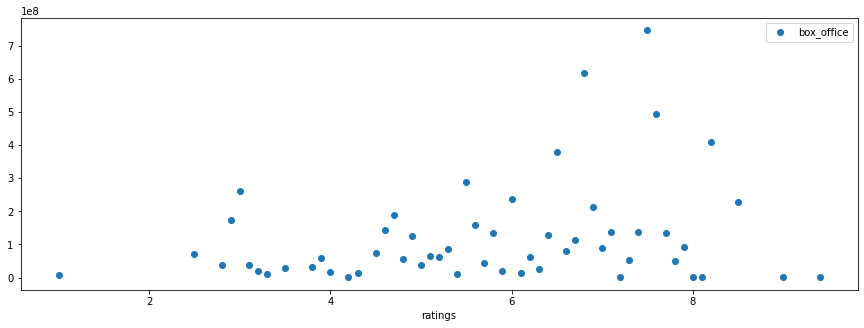

In [67]:
data_support.pivot_table(index = 'ratings', values = 'box_office').plot(style = 'o', figsize = (15,5))
data_support['ratings'].corr(data_support['box_office'])

наблюдается небольшая корреляция, филмьмы с большим рейтингом получают больше сборов

оценим прибыльность фильмов

In [68]:
data_support['profit'] = data_support['box_office'] - data_support['budget']
data_support['profit'].describe()

count              302.00
mean        -3,736,257.73
std        313,787,033.72
min     -1,971,477,243.41
25%        -73,670,053.92
50%        -41,254,152.52
75%         -7,993,141.16
max      2,913,568,690.79
Name: profit, dtype: float64

In [69]:
data_support.query('profit > 0')['profit'].count()

71

из 302 филмов окупились только 80

In [70]:
display(data_support.pivot_table(index = 'show_year', values = 'profit', aggfunc=['sum']))
data_support.pivot_table(index = 'show_year', values = 'profit', aggfunc=['sum']).sum()

,sum
,profit
show_year,
2013,"-235,113,004.90"
2014,"-262,404,887.27"
2015,"-2,060,316,966.88"
2016,"-1,439,953,629.85"
2017,"3,929,881,997.31"
2018,"1,687,602,518.55"
2019,"-2,748,045,861.13"


sum  profit   -1,128,349,834.17
dtype: float64

прибыльными для филмьов были только 2017 и 2018 годы

In [71]:
display(data_support.pivot_table(index = 'show_year', values = 'nonrefundable_support', aggfunc=['sum']))
data_support.pivot_table(index = 'show_year', values = 'nonrefundable_support', aggfunc=['sum']).sum()

,sum
,nonrefundable_support
show_year,
2013,"134,347,945.00"
2014,"475,002,299.00"
2015,"2,820,088,340.00"
2016,"3,240,135,482.00"
2017,"2,379,624,781.00"
2018,"2,556,000,000.00"
2019,"3,218,000,000.00"


sum  nonrefundable_support   14,823,198,847.00
dtype: float64

при этом выделяемые невозвратные средства за каждый из 2015-2019 годов выделялись примерно на одном уровне (3 000 000 000)

Оценим прибыльностьфилмьов по годам:

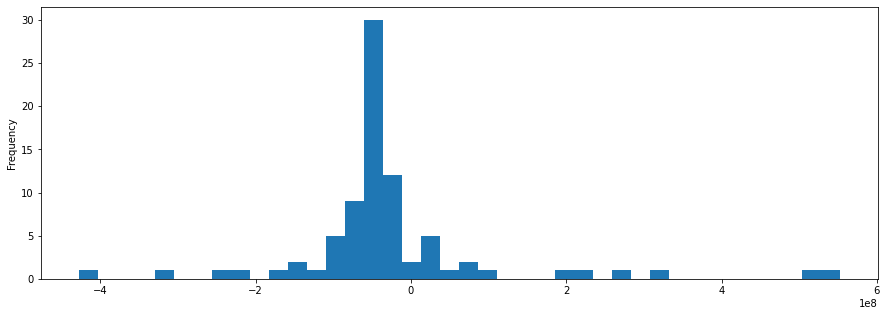

In [72]:
data_support.query('show_year == 2015')['profit'].plot(kind='hist',bins = 40, figsize = (15,5));

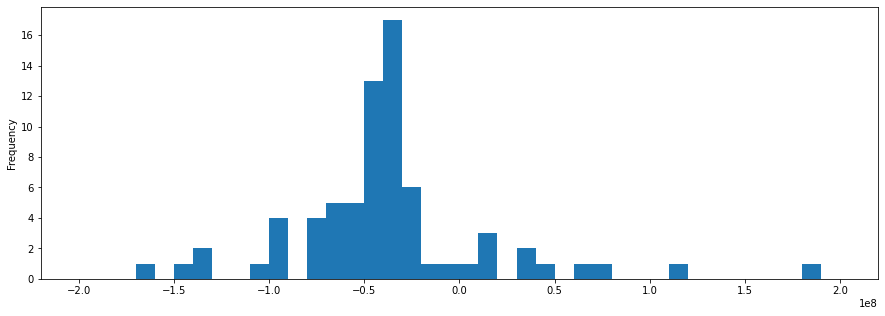

In [73]:
data_support.query('show_year == 2015')['profit'].plot(kind='hist',bins = 40, figsize = (15,5), range = (-200000000, 200000000));

In [74]:
data_support.query('show_year == 2015 and (profit >= 200000000 or profit <= -200000000)')[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office','profit']]

,title,refundable_support,nonrefundable_support,budget,ratings,box_office,profit
1903,призрак_.,0.00,"75,000,000.00","139,551,503.00",7.00,"352,804,320.40","213,252,817.40"
2058,дуxless 2,0.00,"75,000,000.00","122,142,351.75",6.60,"446,163,511.00","324,021,159.25"
2132,битва за севастополь,0.00,"27,510,000.00","131,000,000.00",7.50,"401,804,461.90","270,804,461.90"
2142,территория,"30,000,000.00","30,000,000.00","500,000,000.00",6.80,"72,578,317.40","-427,421,682.60"
2699,он - дракон,0.00,"250,000,000.00","360,000,000.00",6.80,"110,171,448.50","-249,828,551.50"
2701,самый лучший день,"29,000,000.00","34,000,000.00","130,619,336.00",4.70,"683,029,061.40","552,409,725.40"
3042,крякнутые каникулы,"40,000,000.00",0.00,"399,075,326.00",5.40,"69,693,747.93","-329,381,578.07"
3105,иван царевич и серый волк 3,0.00,"40,000,000.00","179,257,987.00",6.20,"704,928,216.00","525,670,229.00"
3142,тайна снежной королевы,"20,000,000.00","5,300,000.00","215,860,000.00",7.20,"1,434,072.50","-214,425,927.50"


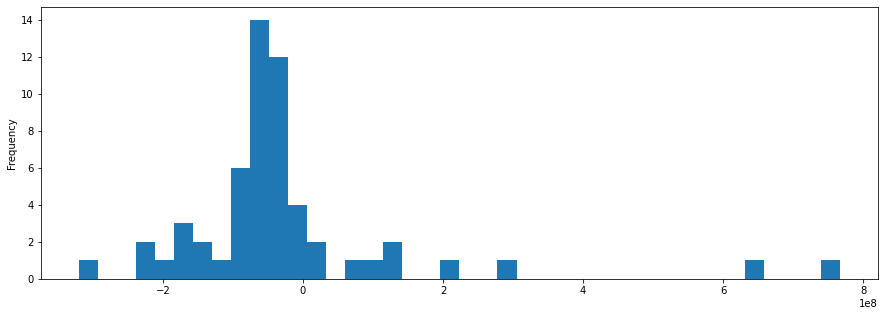

In [75]:
data_support.query('show_year == 2016')['profit'].plot(kind='hist',bins = 40, figsize = (15,5));

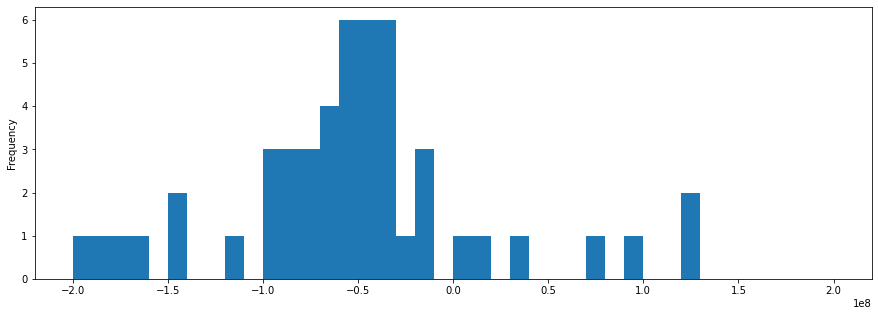

In [76]:
data_support.query('show_year == 2016')['profit'].plot(kind='hist',bins = 40, figsize = (15,5), range = (-200000000, 200000000));

In [77]:
data_support.query('show_year == 2016 and (profit >= 200000000 or profit <= -200000000)')[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office','profit']]

,title,refundable_support,nonrefundable_support,budget,ratings,box_office,profit
2858,28 панфиловцев,0.00,"30,000,000.00","85,384,000.00",7.50,"363,622,804.90","278,238,804.90"
2920,экипаж .,"50,000,000.00","392,104,482.00","635,283,867.00",7.60,"1,402,255,390.00","766,971,523.00"
3229,"гуляй, вася !",0.00,"25,345,000.00","39,000,000.00",6.50,"259,099,078.00","220,099,078.00"
3351,дуэлянт,"150,000,000.00","300,000,000.00","684,200,536.00",6.60,"364,285,139.60","-319,915,396.40"
3352,рай (2016),0.00,"35,000,000.00","287,802,711.00",6.80,"51,704,986.00","-236,097,725.00"
3558,снежная королева 3. огонь и лёд,"60,000,000.00","100,000,000.00","243,122,945.00",6.10,"31,517,776.73","-211,605,168.27"
3565,притяжение (2016),0.00,"250,000,000.00","407,141,172.51",5.60,"1,038,321,489.00","631,180,316.49"


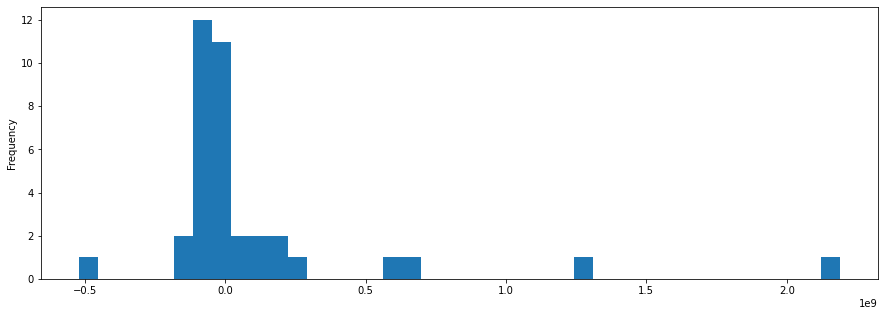

In [78]:
data_support.query('show_year == 2017')['profit'].plot(kind='hist',bins = 40, figsize = (15,5));

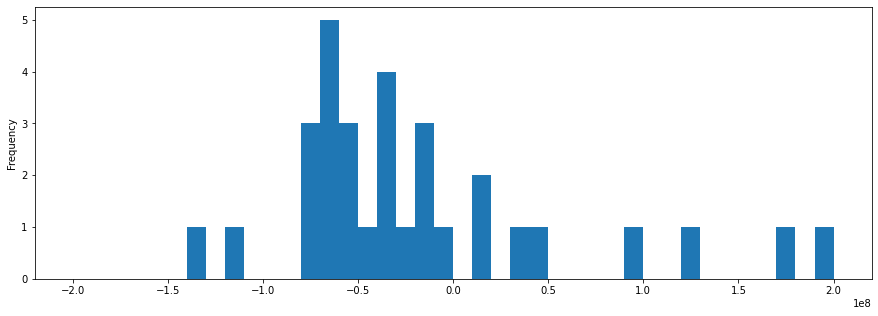

In [79]:
data_support.query('show_year == 2017')['profit'].plot(kind='hist',bins = 40, figsize = (15,5), range = (-200000000, 200000000));

In [80]:
data_support.query('show_year == 2017 and (profit >= 200000000 or profit <= -200000000)')[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office','profit']];

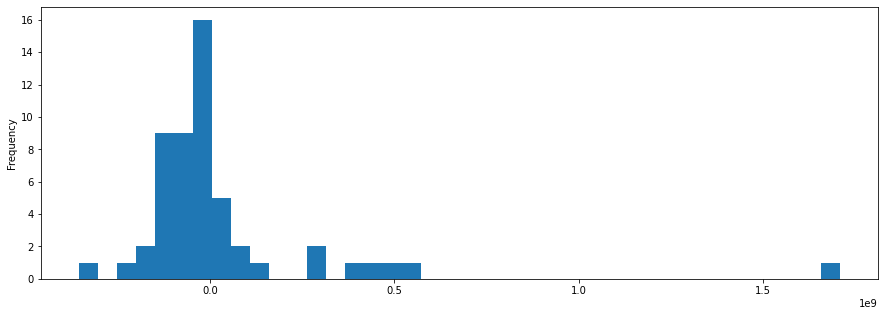

In [81]:
data_support.query('show_year == 2018')['profit'].plot(kind='hist',bins = 40, figsize = (15,5));

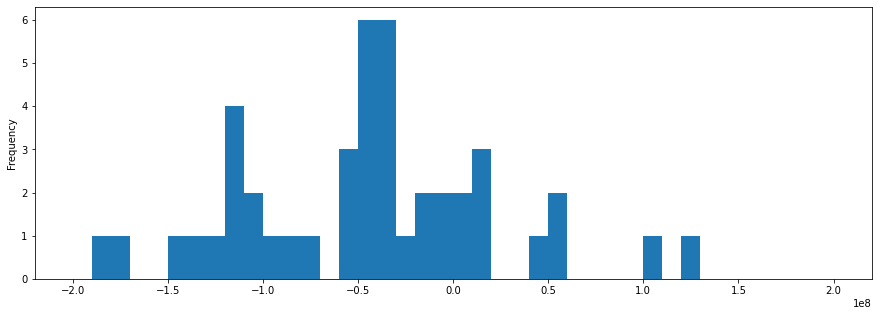

In [82]:
data_support.query('show_year == 2018')['profit'].plot(kind='hist',bins = 40, figsize = (15,5), range = (-200000000, 200000000));

In [83]:
data_support.query('show_year == 2018 and (profit >= 200000000 or profit <= -200000000)')[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office','profit']]

,title,refundable_support,nonrefundable_support,budget,ratings,box_office,profit
5690,рубеж,0.00,"200,000,000.00","292,412,422.00",6.20,"87,707,397.08","-204,705,024.92"
5731,о чем говорят мужчины. продолжение,0.00,"50,000,000.00","109,609,029.00",6.70,"389,818,769.03","280,209,740.03"
5749,я худею,0.00,"30,000,000.00","87,649,127.00",6.90,"633,462,266.74","545,813,139.74"
5826,тренер,0.00,"260,000,000.00","390,191,139.00",6.80,"820,528,005.21","430,336,866.21"
5914,гурвинек. волшебная игра,"30,000,000.00","30,000,000.00","385,000,000.00",3.50,"30,325,879.15","-354,674,120.85"
6178,непрощенный,0.00,"40,000,000.00","82,496,889.00",6.70,"393,279,629.43","310,782,740.43"
6472,три богатыря и наследница престола,"115,000,000.00",0.00,"185,500,705.00",6.50,"577,368,853.25","391,868,148.25"
6509,ёлки последние,"75,000,000.00","25,000,000.00","179,708,770.00",6.90,"701,507,030.27","521,798,260.27"
6549,т-34,"60,000,000.00","120,000,000.00","563,784,717.00",6.50,"2,271,754,004.52","1,707,969,287.52"


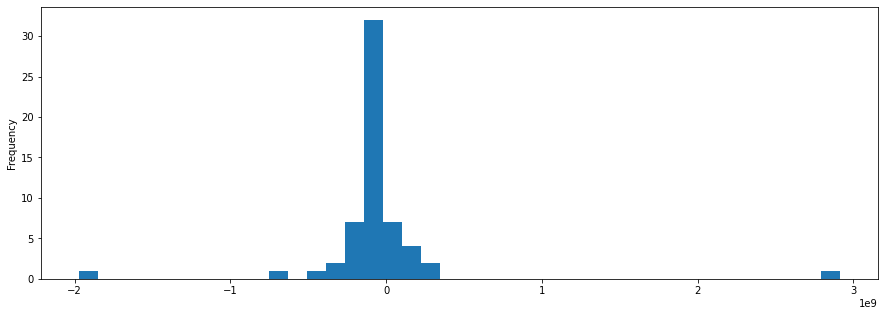

In [84]:
data_support.query('show_year == 2019')['profit'].plot(kind='hist',bins = 40, figsize = (15,5));

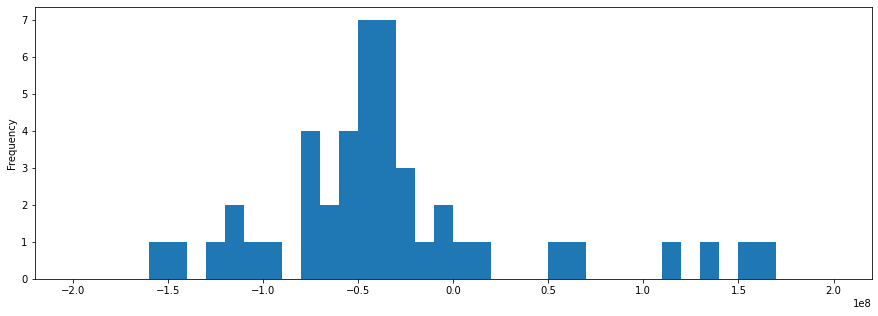

In [85]:
data_support.query('show_year == 2019')['profit'].plot(kind='hist',bins = 40, figsize = (15,5), range = (-200000000, 200000000));

In [86]:
data_support.query('show_year == 2019 and (profit >= 200000000 or profit <= -200000000)')[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office','profit']];

In [87]:
data_support.query('profit >= 500000000 or profit <= -500000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,state_percent,show_year,main_director,main_genres,profit
2701,самый лучший день,111017815,2015-10-14 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,"29,000,000.00","34,000,000.00","130,619,336.00",Фонд кино,4.70,"комедия,музыка","683,029,061.40",48.23,2015,А.Першин (псевдоним Ж.Крыжовников),комедия,"552,409,725.40"
2920,экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00",69.59,2016,Н.Лебедев,драма,"766,971,523.00"
3105,иван царевич и серый волк 3,114004115,2015-12-24 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.00,"40,000,000.00","179,257,987.00",Фонд кино,6.20,"мультфильм,приключения,семейный","704,928,216.00",22.31,2015,Д.Шмидт,мультфильм,"525,670,229.00"
3565,притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","407,141,172.51",Фонд кино,5.60,фантастика,"1,038,321,489.00",inf,2016,Ф.Бондарчук,фантастика,"631,180,316.49"
5437,матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00",29.04,2017,А.Учитель,фэнтези,"-521,130,409.00"
5505,последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,"50,000,000.00","50,000,000.00","352,477,575.00",Фонд кино,6.80,"комедия,фэнтези,приключения","1,655,037,688.00",28.37,2017,Д.Дьяченко,комедия,"1,302,560,113.00"
5641,ёлки новые,111011617,2017-12-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,"50,000,000.00","50,000,000.00","174,381,922.00",Фонд кино,5.80,"комедия,мелодрама","855,451,052.00",57.35,2017,Д.Киселев,комедия,"681,069,130.00"
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00",67.77,2017,А.Мегердичев,спорт,"2,189,493,953.00"
5659,три богатыря и принцесса египта,114003317,2017-12-21 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"50,000,000.00",0.00,"174,464,395.00",Фонд кино,5.50,"мультфильм,приключения,семейный","759,226,773.00",28.66,2017,К.Феоктистов,мультфильм,"584,762,378.00"
5749,я худею,111001618,2018-03-07 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","87,649,127.00",Министерство культуры,6.90,комедия,"633,462,266.74",34.23,2018,А.Черномазов (псевдоним Алексей Нужный),комедия,"545,813,139.74"


In [88]:
data_support.query('budget >= 500000000')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,state_percent,show_year,main_director,main_genres,profit
2142,территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,"30,000,000.00","30,000,000.00","500,000,000.00",Фонд кино,6.80,"детектив,фэнтези,триллер","72,578,317.40",12.00,2015,А.Мельник,детектив,"-427,421,682.60"
2920,экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00",69.59,2016,Н.Лебедев,драма,"766,971,523.00"
3255,время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,"75,000,000.00","175,000,000.00","528,441,977.00",Фонд кино,7.50,"приключения,триллер,биография","544,332,260.00",47.31,2017,Д.Киселев,приключения,"15,890,283.00"
3351,дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60",65.77,2016,А.Мизгирев,драма,"-319,915,396.40"
5437,матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00",29.04,2017,А.Учитель,фэнтези,"-521,130,409.00"
5569,легенда о коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,"100,000,000.00","250,000,000.00","500,012,729.00",Фонд кино,6.40,"история,боевик,фэнтези","590,405,065.00",70.00,2017,И.Шурховецкий,история,"90,392,336.00"
5653,движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00",67.77,2017,А.Мегердичев,спорт,"2,189,493,953.00"
6549,т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52",31.93,2018,А.Сидоров,драма,"1,707,969,287.52"
7114,тайна печати дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59",11.71,2019,О.Степченко,приключения,"-1,971,477,243.41"
7171,грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.00,"60,000,000.00","779,941,965.00",Министерство культуры,6.90,"драма,биография,история","54,243,202.71",7.69,2019,А.Михалков (псевдоним А.Кончаловский),драма,"-725,698,762.29"


В целом картина по каждому году похожа, основная часть фильмов не окупается в прокате<br>
прибыльность фильмов по итогам гоад поределяется успешностью, или неуспешностью блокбастеров

In [89]:
data_studios = data_support.pivot_table(index = 'film_studio', values = 'profit', aggfunc=['sum','count'])

In [90]:
data_studios.columns = ['sum', 'count']
data_studios.query('count > 2')

,sum,count
film_studio,,
"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""","7,085,223.75",3
"ООО ""ВВП Альянс""","-95,744,247.64",3
"ООО ""ВИЗАРТ ФИЛЬМ""","-549,208,997.55",4
"ООО ""Каро Продакшн""","-254,271,785.40",4
"ООО ""Кинокомпания ""СТВ""","-439,602,706.20",6
"ООО ""Киностудия ""ВЕРТИКАЛЬ""","-215,842,610.50",3
"ООО ""Компания ""Новые люди""","-93,597,982.95",3
"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""","-199,938,891.51",3
"ООО ""Нон-Стоп Продакшн""","-896,912,025.90",3


Среди студий с числом фильмов больше 2 наиболее прибыльными являются ООО "Студия анимационного кино "Мельница" и ООО "ТаББаК"

Зависимость бюджета от прибыли

-0.1920975307632652

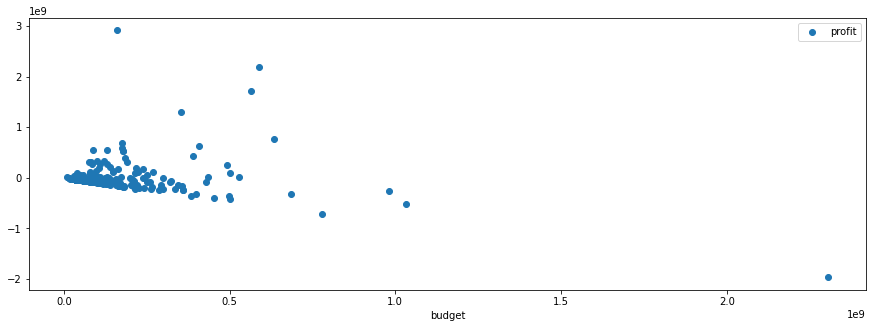

In [91]:
data_support.pivot_table(index = 'budget', values = 'profit').plot(style = 'o', figsize = (15,5))
data_support['budget'].corr(data_support['profit'])

отрицательная корреляция -0,21, показывает что есть обратная зависимость между величиной бюджета и величиной сборов

Исследование величины господдержки

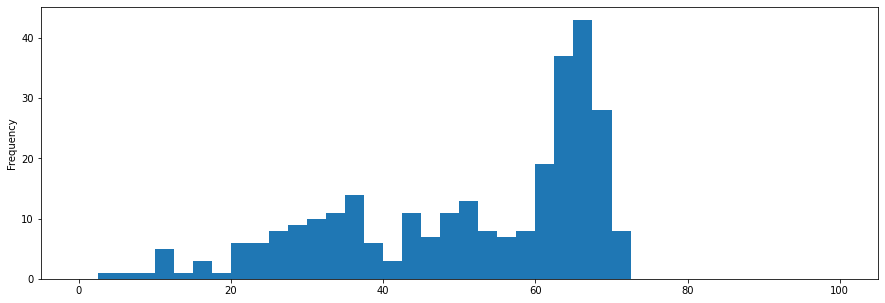

In [92]:
data_support['state_percent'].plot(kind='hist',bins = 40, figsize = (15,5), range = (0,100));

большая часть фильмов получает 65-70 процентов господдержки

In [93]:
data_support.pivot_table(index = 'main_genres', values = 'profit', aggfunc=['sum','count'])

,sum,count
,profit,profit
main_genres,,
биография,"-12,050,599.36",3
боевик,"-137,793,048.70",6
военный,"-268,236,353.20",9
детектив,"-1,059,674,785.60",5
детский,"-136,284,352.00",3
драма,"-1,414,729,163.41",86
история,"-689,593,971.43",4
комедия,"6,331,825,374.17",73


Наиболее прибыльными являются спортивные фильмы и комедии<br>
Убыточные - детективы, драмы, приключения, фэнтэзи

In [94]:
data_support.pivot_table(index = 'financing_source', values = 'profit', aggfunc=['sum','count'])

,sum,count
,profit,profit
financing_source,,
Министерство культуры,"-5,052,311,560.26",142
"Министерство культуры, Фонд кино","-1,799,674,151.61",21
Фонд кино,"5,723,635,877.70",139


фильмы спонсируемые министерством культуры суммарно за все годы были убыточными<br>
Фильмы спонсируемые Фонд кино имели суммарную прибыль за рассматриваемый период

### Общий вывод

Были проанализированы данные о прокатных удостоверениях, и данные о прокате в российских кинотеатрах.<br>
Были обработным некорректные типы данных и аномальные значения.<br>
<br>
Выводы по анализу данных о прокате в российских кинотеатрах:<br>
* в период с 2010 по 2019 год выходило от 505 до 985 фильмов в год. наибольшее количество фильмов было выпущено в 2010 (985) и в 2019(930) году, в 2017 наименьшее(505)<br>

* процент известных данных о прокате возрастает с каждым годом, с 10% в 2010 до 70% в 2017, известных данных о прокате за 2018 - 2019 годы ~ 55%<br>

* медианная сумма сборов, за 2016 и 2019 примерно в 2 раза меньше чем за 2017 и 2018 при этом средние значения не так сильно отличаются, по видимому в 2016 и 2019, выходили блокбастеры с большими сборами, что и определило высокие сборы за год<br>

* наименьшие сборы у фильмов «0+», кроме того после 2016 года фильмы такой категории практически перестали выпускать наиболее успешные по сборам за каждый фильм - фильмы категории «12+» наибольшая сумма сборову фильмов «16+» в связи с тем что в этой категории выпускается больше фильмов

* самое большое медианное значение сборов имеют фильмы 6+ (21 млрд), без учета блокбастеров, фильмы этой категории являются самыми успешными в прокате

* средние значения сборов для фильмов 12+ в 20 раз превышают медианные, что может свидетельствовать о том, что в этой возрастной категории снимается большинство блокбастеров.


Выполнен анализ фильмов с господдержкой.<br>
Удалены cтроки с отсутствующими данными(9.9%)<br>
Выводы по анализу данных фильмов с господдержкой:<br>

* Медианный бюджет фильмов с гос поддержкой увеличивался с 2013 (255 млн.) по 2018(6,5 млрд.) годы, в 2019(10,8 млрд) году сумма бюджетов выросла практически в 2 раза по сравнению с предыдущим годом, при этом медианный бюджет снизился на 10 процентов(87 -> 80 млн), что может свидетельствовать о наибольшем количестве выпускаемых высокобюджетных фильмов в 2019 году.
* каждый год, доля гос поддержки в фильмах составляла 50-60 процентов.
* общие сборы росли с 2013(20 млн.)  по 2017(10,85 млрд)  годы, затем за 2018 и 2019 (8,5 млрд) года были одинаковыми, и снизились на 30 процентов от 2017 года
* средний рейтинг по годам держится в рйоне 6 баллов
* наблюдается небольшая корреляция, филмьмы с большим рейтингом получают больше сборов
* из 302 филмов окупились только 80
* прибыльными для филмьов были только 2017 и 2018 годы
* при этом невозвратные средства за каждый из 2015-2019 годов выделялись примерно на одном уровне (3 млрд)
* картина прибыльности фильмов по годам в целом схожа, основная часть фильмов не окупается в прокате, прибыльность по итогам года определяется успешностью, или не успешностью в прокате нескольких высокобюджетных фильмов.
* Среди студий с числом фильмов больше 2 наиболее прибыльными являются ООО "Студия анимационного кино "Мельница" и ООО "ТаББаК" (по ~1.4 млрд).
* Отрицательная корреляция -0,21, показывает что есть обратная зависимость между величиной бюджета и величиной сборов
* Наиболее прибыльными являются спортивные фильмы(2,25 млрд) и комедии(6,7 млрд), Убыточные – детективы(-1  млрд ), драмы(-1,2  млрд ), приключения(-2,1  млрд ), фэнтэзи (-1,3  млрд )
* Фильмы спонсируемые министерством культуры суммарно за все годы были убыточными(-5  млрд ), Фильмы спонсируемые Фонд кино имели суммарную прибыль за рассматриваемый период(-5 млрд )